<a href="https://colab.research.google.com/github/inixrust/datasets/blob/main/Day4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## K-Means Clustering

### Explore Dataset

In [1]:
# gunakan wget/ get untuk mengambil dataset dari web
# parameter --no-check-certificate untuk tidak melakukan check certificate dari web bersangkutan
!wget --no-check-certificate https://raw.githubusercontent.com/lukpras/Data-Science-for-Marketing-Analytics/master/Lesson03/ageinc.csv

--2024-09-05 02:36:36--  https://raw.githubusercontent.com/lukpras/Data-Science-for-Marketing-Analytics/master/Lesson03/ageinc.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10371 (10K) [text/plain]
Saving to: ‘ageinc.csv’

ageinc.csv          100%[===================>]  10.13K  --.-KB/s    in 0s      

2024-09-05 02:36:37 (58.9 MB/s) - ‘ageinc.csv’ saved [10371/10371]



In [2]:
# import library pandas untuk manipulasi dataframe
import pandas as pd

In [3]:
# baca file csv kedalam dataframe pandas
df = pd.read_csv('/content/ageinc.csv')

In [4]:
# cek dataset
df.head()

,income,age
0,101743,58
1,49597,27
2,36517,52
3,33223,49
4,72994,53


In [5]:
# cek inforamsi dari dataframe
df.info()
# tidak terdapat nilai null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   income  1000 non-null   int64
 1   age     1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [6]:
# import library visualisasi untuk membuat visual scatter plot
import matplotlib.pyplot as plt

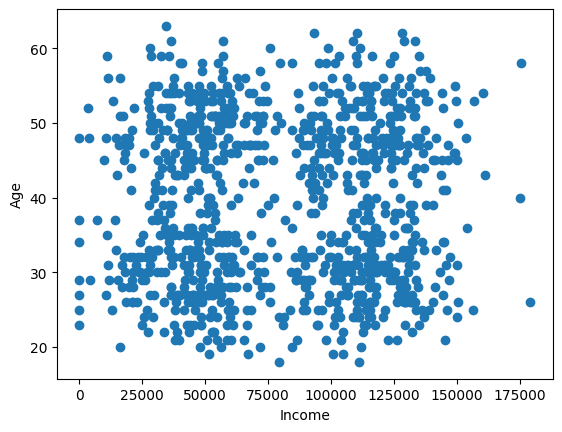

In [7]:
# membuat scatterplot untuk nilai income dan age
plt.scatter(x = df['income'], y = df['age'])
# beri label
plt.xlabel("Income")
plt.ylabel("Age")
# menampilkan visual dan menghilangkan perhitungan array
plt.show()

### Preprocessing dengan Standarisasi

In [8]:
# Standarisasi Data Menggunakan Skala standar distribusi normal
df['z_income'] = (df['income'] - df['income'].mean()) / df['income'].std()
df['z_age'] = (df['age'] - df['age'].mean()) / df['age'].std()
df.head()

,income,age,z_income,z_age
0,101743,58,0.550812,1.693570
1,49597,27,-0.777331,-1.130565
2,36517,52,-1.110474,1.146963
3,33223,49,-1.194372,0.873660
4,72994,53,-0.181416,1.238064


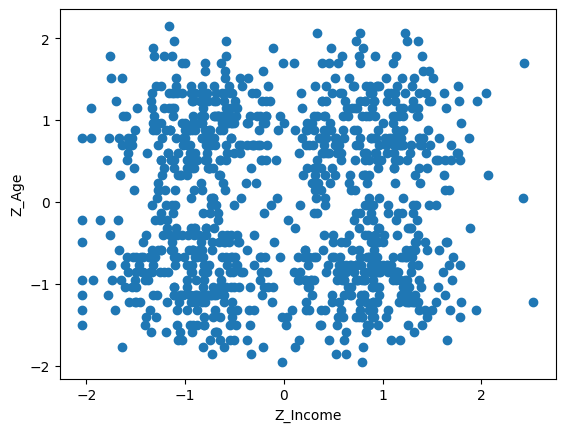

In [9]:
# lakukan visualisasi scatterplot kembali
plt.scatter(x = df['z_income'], y = df['z_age'])
plt.xlabel("Z_Income")
plt.ylabel("Z_Age")
plt.show()

### Membuat Model

In [10]:
# import library clustering KMeans
from sklearn.cluster import KMeans

In [11]:
# gunakan variabel "km" sebagai variabel dari model
km = KMeans(n_clusters=2, max_iter=10, random_state= 10, verbose=1)

# fitting data ke model
km.fit(df[['z_income', 'z_age']])

Initialization complete
Iteration 0, inertia 1934.3158954982366.
Iteration 1, inertia 1284.5140782451706.
Iteration 2, inertia 1228.1748599054433.
Iteration 3, inertia 1199.8868667218173.
Iteration 4, inertia 1195.8174021298296.
Iteration 5, inertia 1194.7253690191417.
Iteration 6, inertia 1194.463312790957.
Converged at iteration 6: strict convergence.
Initialization complete
Iteration 0, inertia 1774.1323397288477.
Iteration 1, inertia 1313.391366778675.
Iteration 2, inertia 1295.719081444806.
Iteration 3, inertia 1256.626644386771.
Iteration 4, inertia 1210.7081732327702.
Iteration 5, inertia 1196.9451955895595.
Iteration 6, inertia 1194.950541936144.
Iteration 7, inertia 1194.4899338734585.
Converged at iteration 7: center shift 5.3253192086432684e-05 within tolerance 9.989999999999985e-05.
Initialization complete
Iteration 0, inertia 1799.3155502060386.
Iteration 1, inertia 1330.593214227565.
Iteration 2, inertia 1291.4363911970397.
Iteration 3, inertia 1236.6419309953683.
Iterati

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(max_iter=10, n_clusters=2, random_state=10, verbose=1)

### Hasil Clustering


In [12]:
# input hasil clustering kedalam kolom baru bernama "cluster_kmeans"
df['cluster_kmeans'] = km.labels_
df.head()

,income,age,z_income,z_age,cluster_kmeans
0,101743,58,0.550812,1.693570,1
1,49597,27,-0.777331,-1.130565,0
2,36517,52,-1.110474,1.146963,0
3,33223,49,-1.194372,0.873660,0
4,72994,53,-0.181416,1.238064,0


In [13]:
# cek jumlah cluster
df['cluster_kmeans'].unique()

array([1, 0], dtype=int32)

In [14]:
# cek cluster pertama dengan label 0
d = df[df['cluster_kmeans'] == 0]
d

,income,age,z_income,z_age,cluster_kmeans
1,49597,27,-0.777331,-1.130565,0
2,36517,52,-1.110474,1.146963,0
3,33223,49,-1.194372,0.873660,0
4,72994,53,-0.181416,1.238064,0
5,38361,26,-1.063508,-1.221666,0
...,...,...,...,...,...
989,51601,19,-0.726289,-1.859374,0
994,44937,54,-0.896019,1.329166,0
995,70615,29,-0.242008,-0.948363,0
997,42203,35,-0.965654,-0.401756,0


### Visualisasi Hasil Clustering

In [15]:
# definisikan marker untuk membuat visual dari scatter plot yang telah di clustering
marker = ['^', 'o']
color = ['r', 'b']

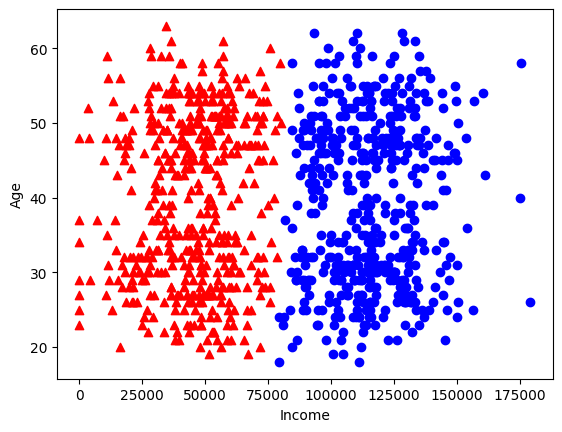

In [16]:
# gunakan kondisi looping untuk setiap cluster dan beri bentuk node serta warna
for c in df['cluster_kmeans'].unique():
  # kondisi looping jika cluster memiliki nilai c
  d = df[df['cluster_kmeans'] == c]
  # membuat visual berdasrkan hasil looping setiap cluster
  plt.scatter(x = d['income'], y = d['age'], marker=marker[c], color=color[c])

# beri label untuk axis x dan y
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

### Membuat Clustering untuk beberapa jumlah Cluster

In [17]:
# definisikan marker dan warna kembali untuk membuat beberapa cluster
marker = ['^', 'o', 'd', 'X', 's', 'P']
color = ['r', 'b', 'k', 'y', 'g', 'm']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

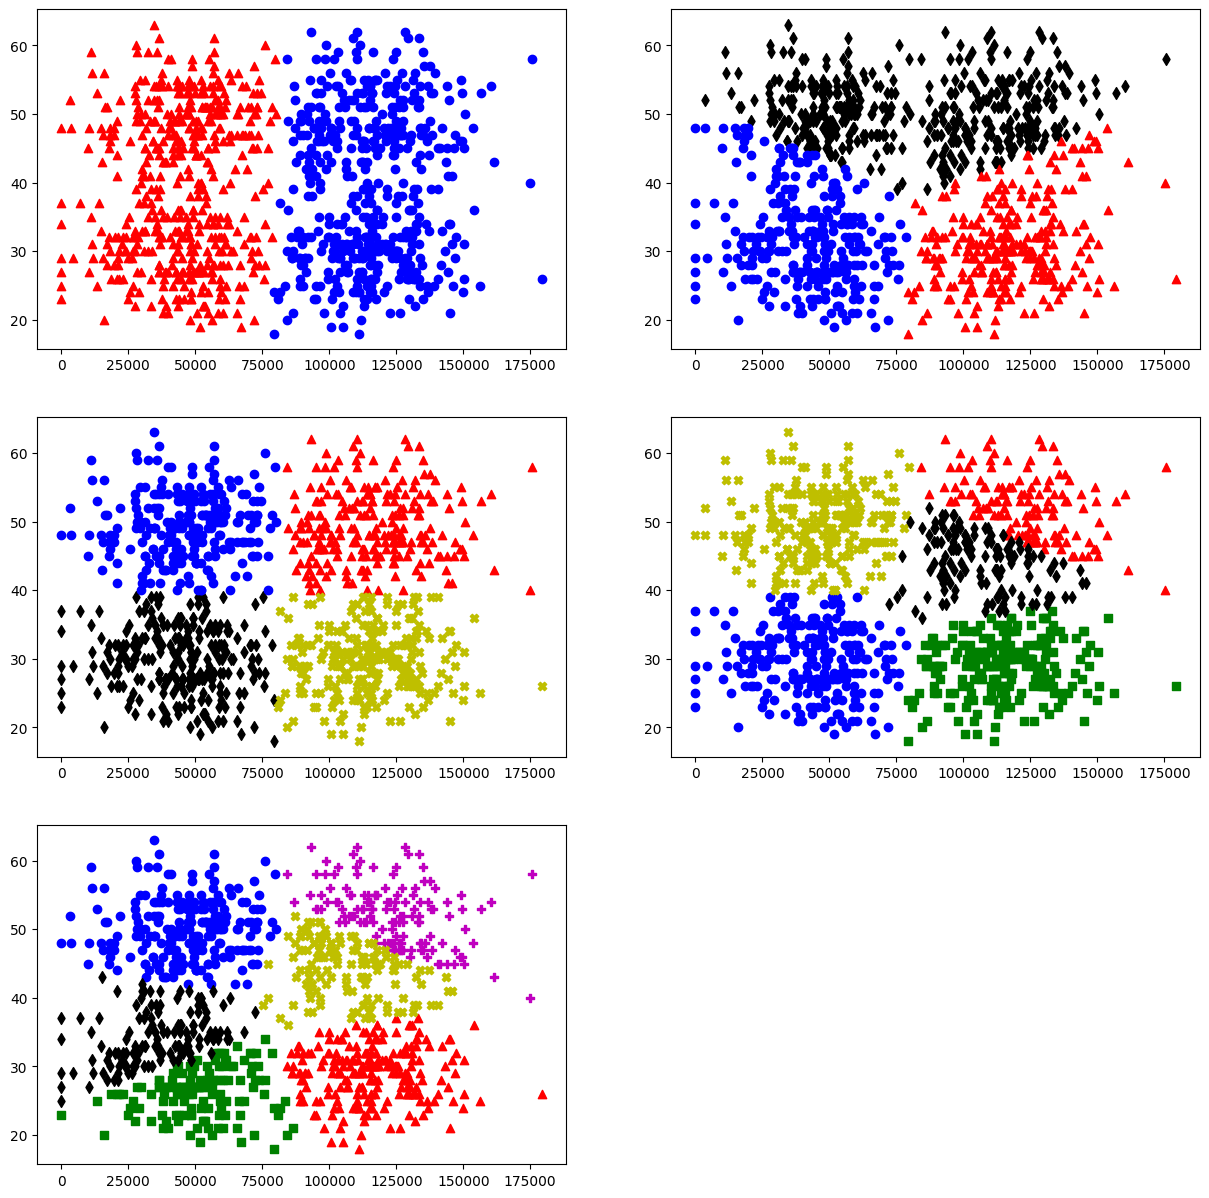

In [18]:
# membuat visual dari clustering
# definisikan ukuran gambar untuk setiap kotak visual
plt.figure(figsize=(15,15))

# lakukan looping untuk cluster 2 s/d (7-1)
for n in range(2, 7):
  # buat model berdaasrkan variabel looping
  model = KMeans(n_clusters=n, random_state= 10)

  # buat prediksi dan masukan kedalam kolom baru
  df['cluster_kmeans'] = model.fit_predict(df[['z_income', 'z_age']])

  # masukan hasil clustering kedalam subplot (kotak visual)
  plt.subplot(3, 2, n-1)
  # looping tingkat kedua untuk memberi warna dari setiap cluster yang ada
  for c in df['cluster_kmeans'].unique():
    d = df[df['cluster_kmeans'] == c]
    plt.scatter(d['income'], d['age'], marker=marker[c], color=color[c])

plt.show()

### Evaluasi Model

In [19]:
# import library numpy untuk membuat kalkulasi
import numpy as np

In [20]:
# definisikan list kosong untuk sum-square dari hasil clustering
ss = []

# definisikan range clustering
krange = list(range(2, 11))

# definisikan input clustering
X = df[['z_income', 'z_age']].values

# membuat looping untuk setiap clustering dalam range
for n in krange:
  # membuat model
  model = KMeans(n_clusters=n, random_state= 10)

  # fitting model ke data
  model.fit_predict(X)

  # keluarkan label hasil clustering
  klaster = model.labels_

  # hitung pusat cluster
  pusat = model.cluster_centers_

  # input nilai kedekatan dari setiap cluster ke list yang sudah disiapkan
  ss.append(np.sum((X - pusat[klaster]) **2))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

In [21]:
# cek sum-square
ss

[1189.7476232504314,
 734.5803231794216,
 386.0702389582009,
 344.25845449011496,
 303.8298908852124,
 270.0852025680623,
 242.69431665030066,
 214.51906429094618,
 192.70148037182258]

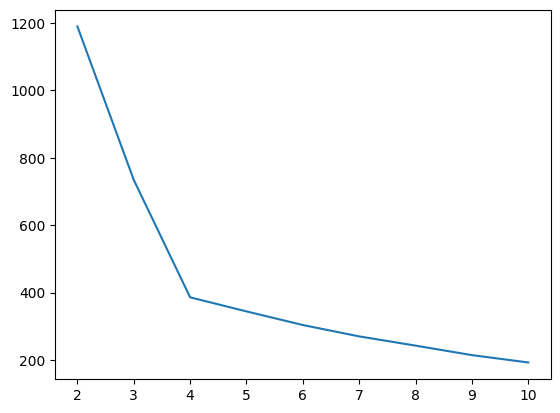

In [22]:
# buat visual untuk sum-square
plt.plot( krange, ss)
plt.show()

In [23]:
# mencari nilai sum-square menggunakan syntax dari kmeans
# sum-square = inertia

inertia = []
krange = list(range(2, 11))
X = df[['z_income', 'z_age']].values
for n in krange:
  model = KMeans(n_clusters=n, random_state= 10)
  model.fit_predict(X)
  klaster = model.labels_
  inertia.append(model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

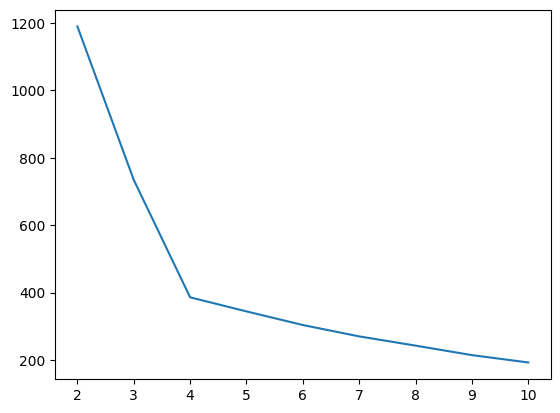

In [24]:
# membuat visual dari inertia
plt.plot(krange, inertia)

In [25]:
# membuat model berdasarkan inertia/ sum-square terkecil
model_fix = KMeans(n_clusters=4, random_state= 10)
model_fix.fit_predict(X)
df['cluster_kmeans'] = model_fix.labels_
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,income,age,z_income,z_age,cluster_kmeans
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,2
2,36517,52,-1.110474,1.146963,1
3,33223,49,-1.194372,0.873660,1
4,72994,53,-0.181416,1.238064,1


In [26]:
# cek jumlah cluster
df.cluster_kmeans.unique()

array([0, 2, 1, 3], dtype=int32)

## Principal Component Analysis (PCA) untuk Reduksi Dimensi

### Explore Dataset

In [36]:
# import data menggunakan wget
!wget --no-check-certificate https://raw.githubusercontent.com/lukpras/Data-Science-for-Marketing-Analytics/master/Lesson03/three_col.csv

--2024-09-05 04:08:47--  https://raw.githubusercontent.com/lukpras/Data-Science-for-Marketing-Analytics/master/Lesson03/three_col.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14404 (14K) [text/plain]
Saving to: ‘three_col.csv’

three_col.csv       100%[===================>]  14.07K  --.-KB/s    in 0.001s  

2024-09-05 04:08:47 (24.4 MB/s) - ‘three_col.csv’ saved [14404/14404]



In [37]:
# masukan data dari csv kedalam dataframe pandas
df2 = pd.read_csv('/content/three_col.csv')
df2.head()

,income,age,days_since_purchase
0,56432,31,492
1,137580,38,551
2,68285,59,304
3,93617,51,507
4,113441,54,509


### Preprocessing dengan Standarisasi

In [38]:
# membuat looping standarisasi untuk setiap kolom dalam dataframe
kolom = df2.columns
zkolom = []
for kol in kolom:
  df2['z_' + kol] = (df2[kol] - df2[kol].mean()) / df2[kol].std()
  zkolom.append('z_' + kol)

In [39]:
# cek dataframe
df2.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase
0,56432,31,492,-0.606833,-0.748848,0.818321
1,137580,38,551,1.505879,-0.135469,1.349109
2,68285,59,304,-0.298237,1.704668,-0.873001
3,93617,51,507,0.361289,1.003663,0.953267
4,113441,54,509,0.877413,1.266540,0.971260


In [40]:
# cek kolom yang telah dilakukan standarisasi
zkolom

['z_income', 'z_age', 'z_days_since_purchase']

### Membuat Model

In [41]:
# membuat model clustering lebih dari 2 variabel
model = KMeans(n_clusters=4, random_state= 10)
df2['cluster'] = model.fit_predict(df2[zkolom])
df2.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase,cluster
0,56432,31,492,-0.606833,-0.748848,0.818321,3
1,137580,38,551,1.505879,-0.135469,1.349109,1
2,68285,59,304,-0.298237,1.704668,-0.873001,0
3,93617,51,507,0.361289,1.003663,0.953267,1
4,113441,54,509,0.877413,1.266540,0.971260,1


### Reduksi Dimensi dan Visualisasi

In [42]:
# import library Principal Component Analysis (PCA)
from sklearn.decomposition import PCA

In [43]:
# definisikan PCA dengan jumlah dimensi = 2
pca = PCA(n_components=2)

# input 3 kolom dimensi kedalam PCA dan akan menghasilkan 2 dimensi
df2['pca1'], df2['pca2'] = zip(*pca.fit_transform(df2[zkolom]))
df2.head()

,income,age,days_since_purchase,z_income,z_age,z_days_since_purchase,cluster,pca1,pca2
0,56432,31,492,-0.606833,-0.748848,0.818321,3,-0.146251,0.208657
1,137580,38,551,1.505879,-0.135469,1.349109,1,-2.017272,0.188518
2,68285,59,304,-0.298237,1.704668,-0.873001,0,0.815283,-1.339297
3,93617,51,507,0.361289,1.003663,0.953267,1,-0.938956,-1.076085
4,113441,54,509,0.877413,1.266540,0.971260,1,-1.317778,-1.146315


In [44]:
# definisikan bentuk dan warna untuk visualisasi
marker= ['^', 'o', 's', 'P']
color= ['b', 'r', 'g', 'y']

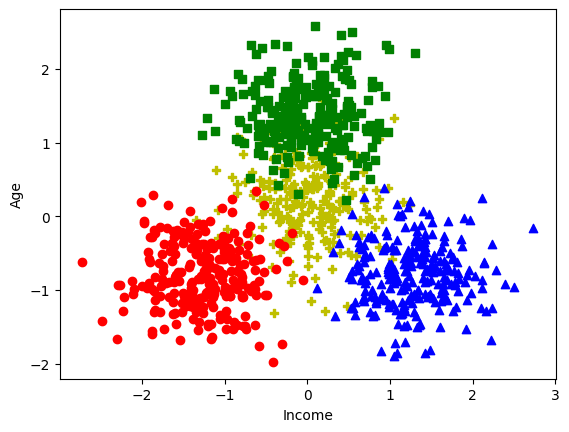

In [45]:
# membuat visualisasi dari hasil clustering dengan axis X dan Y merupakan dimensi PCA
for c in df2['cluster'].unique():
  d = df2[df2['cluster'] == c]
  plt.scatter(x = d['pca1'], y = d['pca2'], marker=marker[c], color=color[c])

plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

In [46]:
!pip install ipympl
!pip install mplot3d-dragger

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 2.9 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)


In [47]:
from google.colab import output
output.enable_custom_widget_manager()

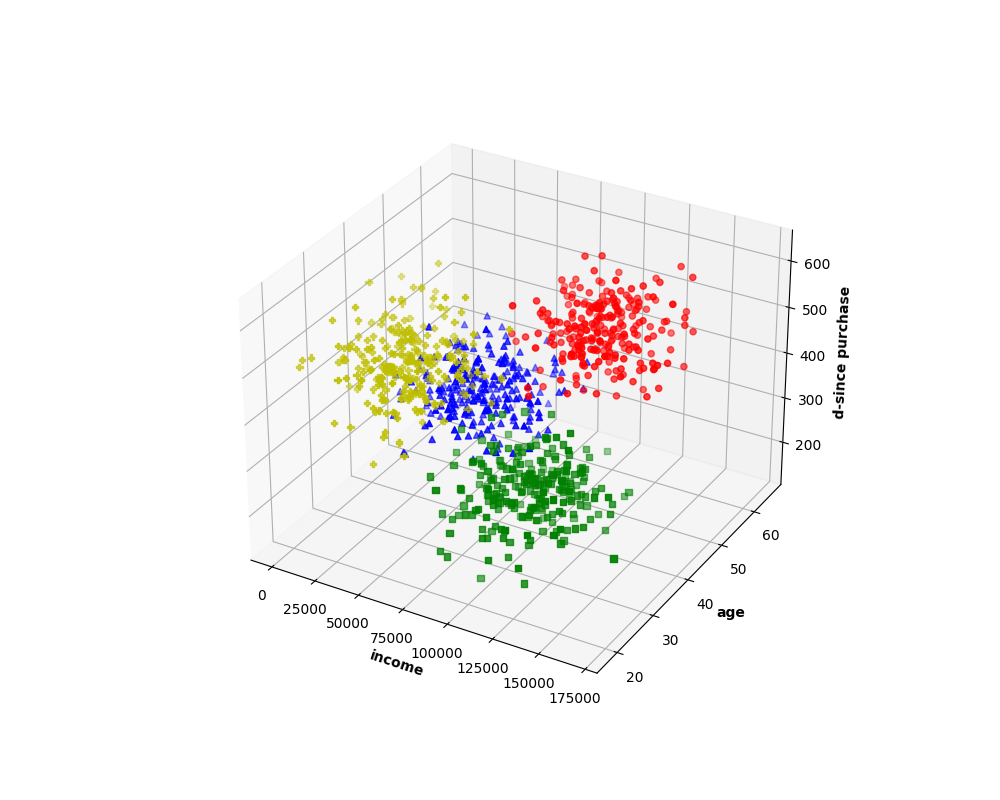

In [48]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

plt.figure(figsize=(10,8))
ax = plt.axes(projection= '3d')

for c in df2['cluster'].unique():
  d = df2[df2['cluster'] == c]
  ax.scatter(d.income, d.age, d.days_since_purchase, color = color[c], marker = marker[c])
ax.set_xlabel('income', fontweight='bold')
ax.set_ylabel('age', fontweight='bold')
ax.set_zlabel('d-since purchase', fontweight='bold')

plt.show()

## MeanShift Clustering

In [49]:
# import library MeanShift dan estimate Bandwidth
from sklearn.cluster import MeanShift, estimate_bandwidth

In [50]:
# cek dataframe
df.head()

,income,age,z_income,z_age,cluster_kmeans
0,101743,58,0.550812,1.693570,0
1,49597,27,-0.777331,-1.130565,2
2,36517,52,-1.110474,1.146963,1
3,33223,49,-1.194372,0.873660,1
4,72994,53,-0.181416,1.238064,1


### Membuat Model

In [51]:
# definisikan kolom yang akan dilakukan clustering
X_ms = df[['z_income', 'z_age']]

# definisikan bandwidth untuk data clustering
bw = estimate_bandwidth(X_ms, quantile=0.2)

# membuat model MeanShift berdasarakna bandwidth yang telah dihitung
ms = MeanShift(bandwidth=bw)

# fitting model kedalam data clustering
ms.fit(X_ms)

MeanShift(bandwidth=0.967015297350601)

In [52]:
# cek label hasil clustering
df['cluster_ms'] = ms.labels_

In [53]:
# cek jumlah cluster hasil clustering MeanShift
df['cluster_ms'].nunique()

4

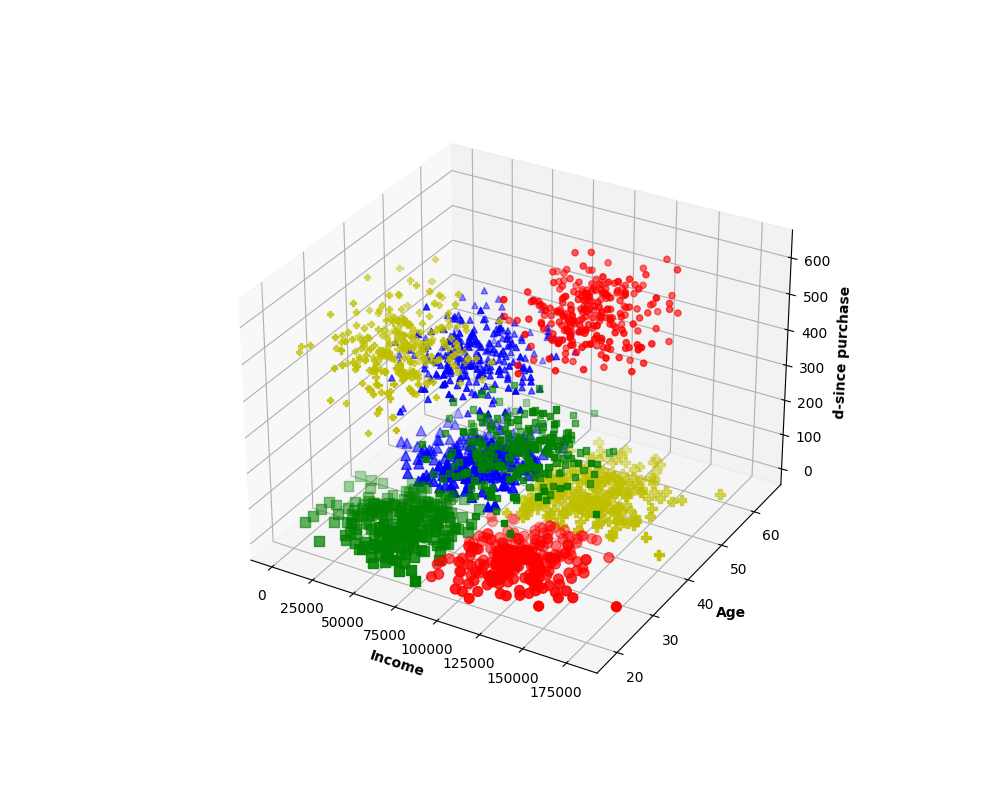

In [55]:
# membuat looping untuk visual dari hasil clustering MeanShift
for c in df['cluster_ms'].unique():
  d = df[df['cluster_ms'] == c]
  plt.scatter(x = d['income'], y = d['age'], marker=marker[c], color=color[c], s=50)

plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

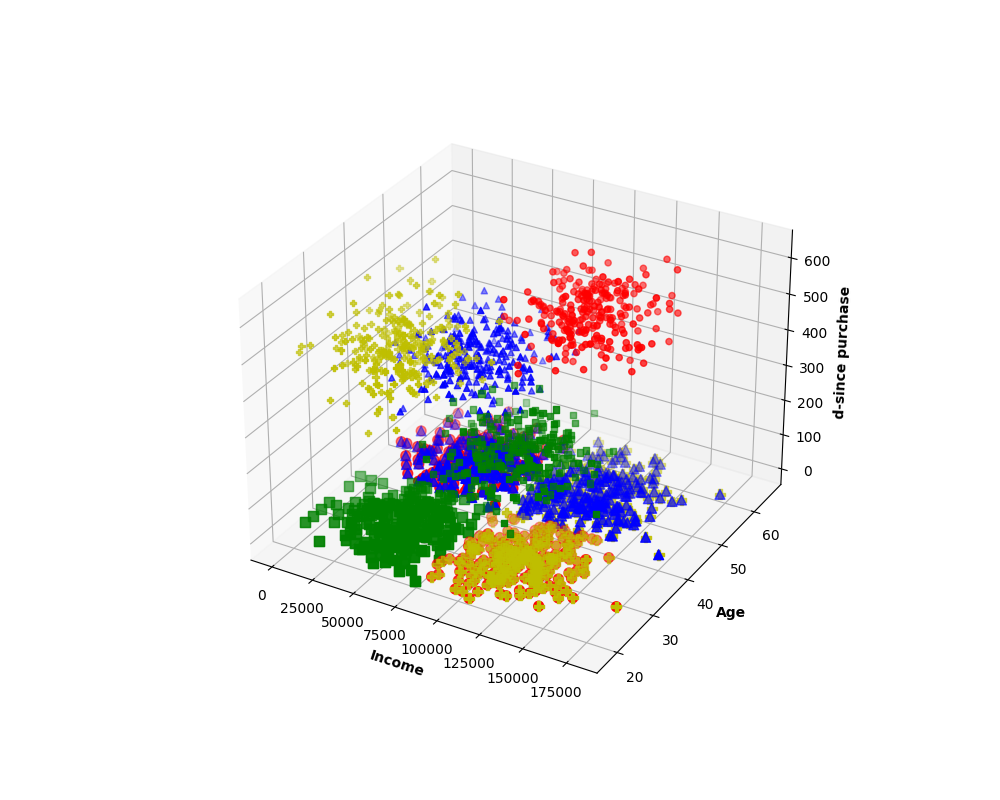

In [57]:
# Cek clustering dari hasil Clustering KMeans
for c in df['cluster_kmeans'].unique():
  d = df[df['cluster_kmeans'] == c]
  plt.scatter(x = d['income'], y = d['age'], marker=marker[c], color=color[c], s=50)

plt.xlabel("Income")
plt.ylabel("Age")
plt.show()